## SST Upwelling Index

- Downloaded from CoastNET geoportal: http://geoportal.coastnet.pt
- 04/01/1982 - 09/11/2021
  

In [11]:
## import packages
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from global_land_mask import globe
import glob
import os
import math

In [12]:
## import data
os.chdir("/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/Data.nosync/")
UI_SST = xr.open_dataset('UI_SST.nc')


In [13]:
UI_SST

<xarray.Dataset> Size: 272MB
Dimensions:  (lon: 33, time: 2080, lat: 165)
Coordinates:
  * lon      (lon) float64 264B -15.02 -10.0 -9.77 ... -8.228 -8.145 -8.02
  * time     (time) datetime64[ns] 17kB 1982-01-05 1982-01-12 ... 2021-11-09
  * lat      (lat) float64 1kB 37.01 37.05 37.1 37.14 ... 43.72 43.76 43.8 43.84
Data variables:
    UI       (time, lon, lat) float64 91MB ...
    Tmid     (time, lon, lat) float64 91MB ...
    Toff15W  (time, lon, lat) float64 91MB ...
Attributes: (12/20)
    Conventions:       CF-1.0
    title:             Data
    source:            CoastNet
    institution:       MARE-UL and Greg
    references:        http://geoportal.coastnet.pt
    easting:           lon
    ...                ...
    CoordinateAxes_:   time lon lat
    CoordSysBuilder_:  ucar.nc2.dataset.conv.CF1Convention
    history:           Data extracted from dataset weekly archive available a...
    time:              2080
    lat:               165
    lon:               31

In [ ]:
UI_SST.time

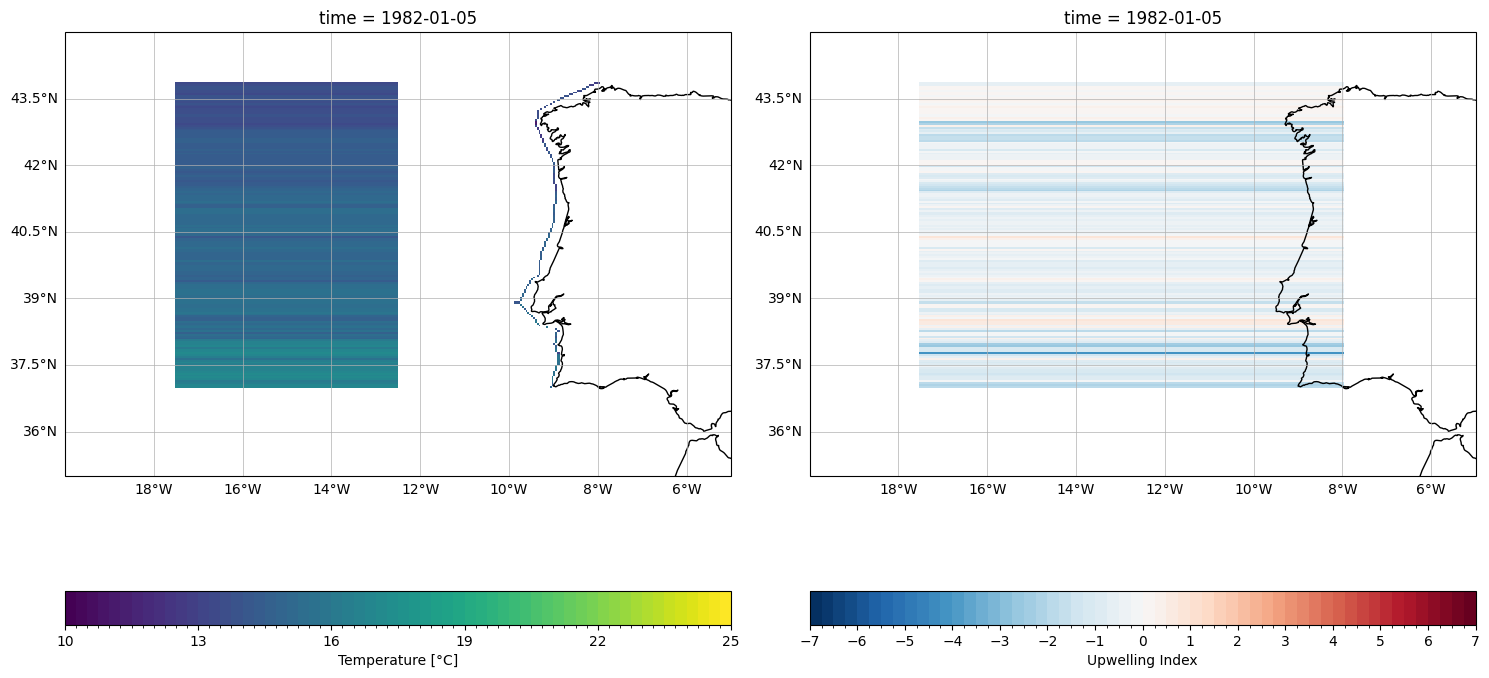

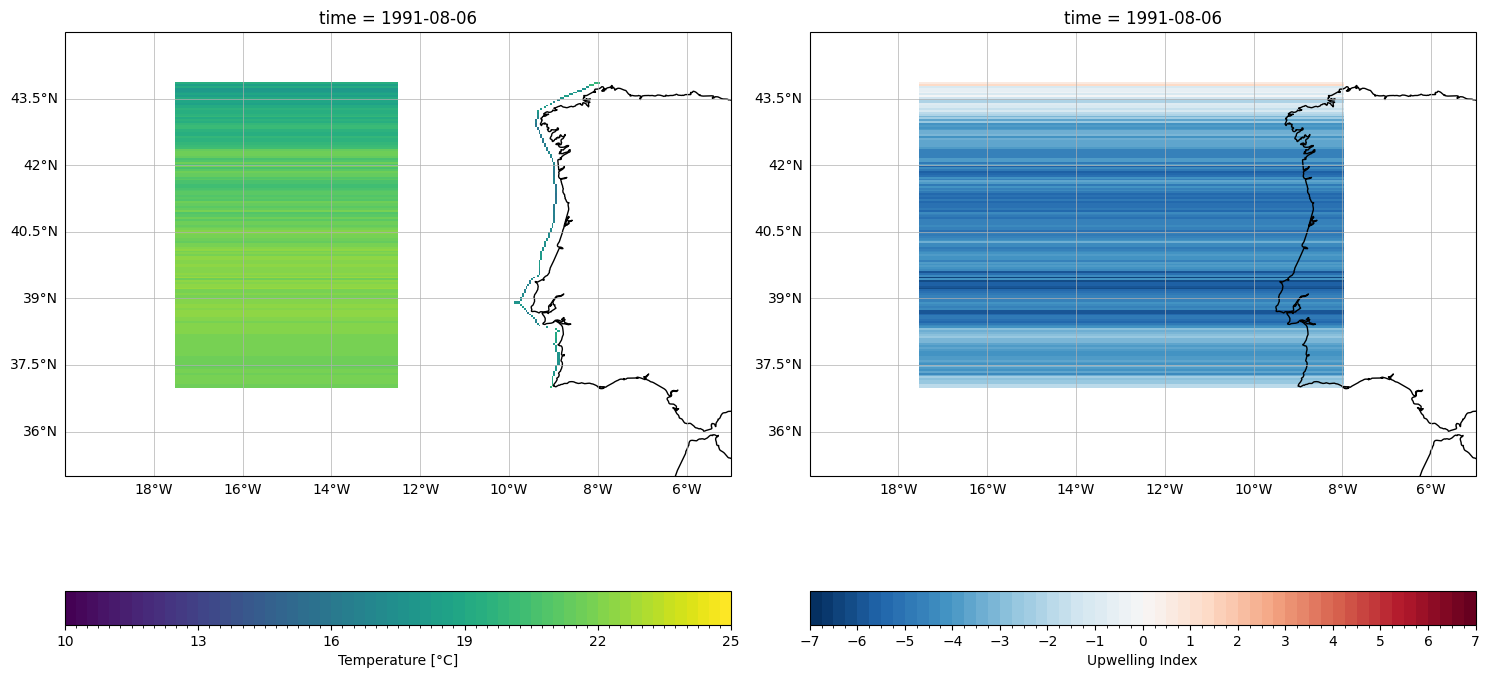

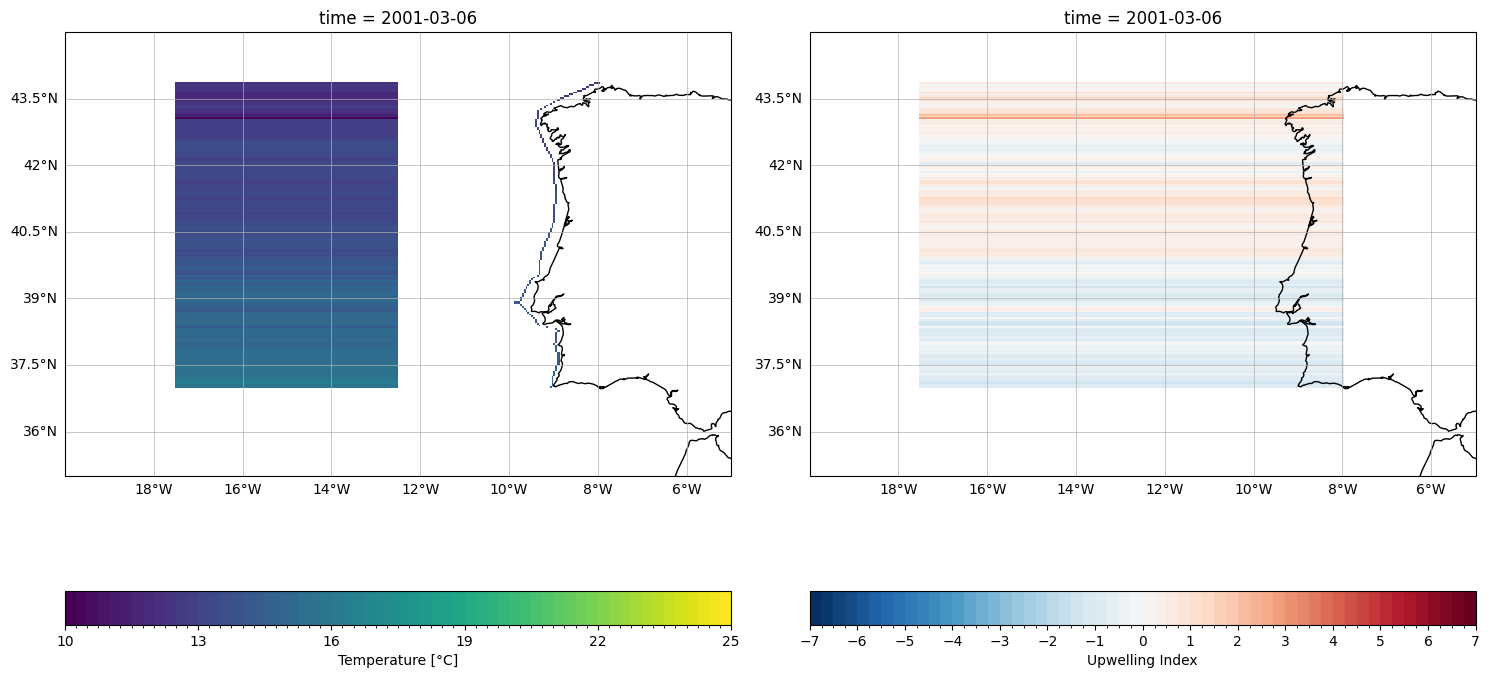

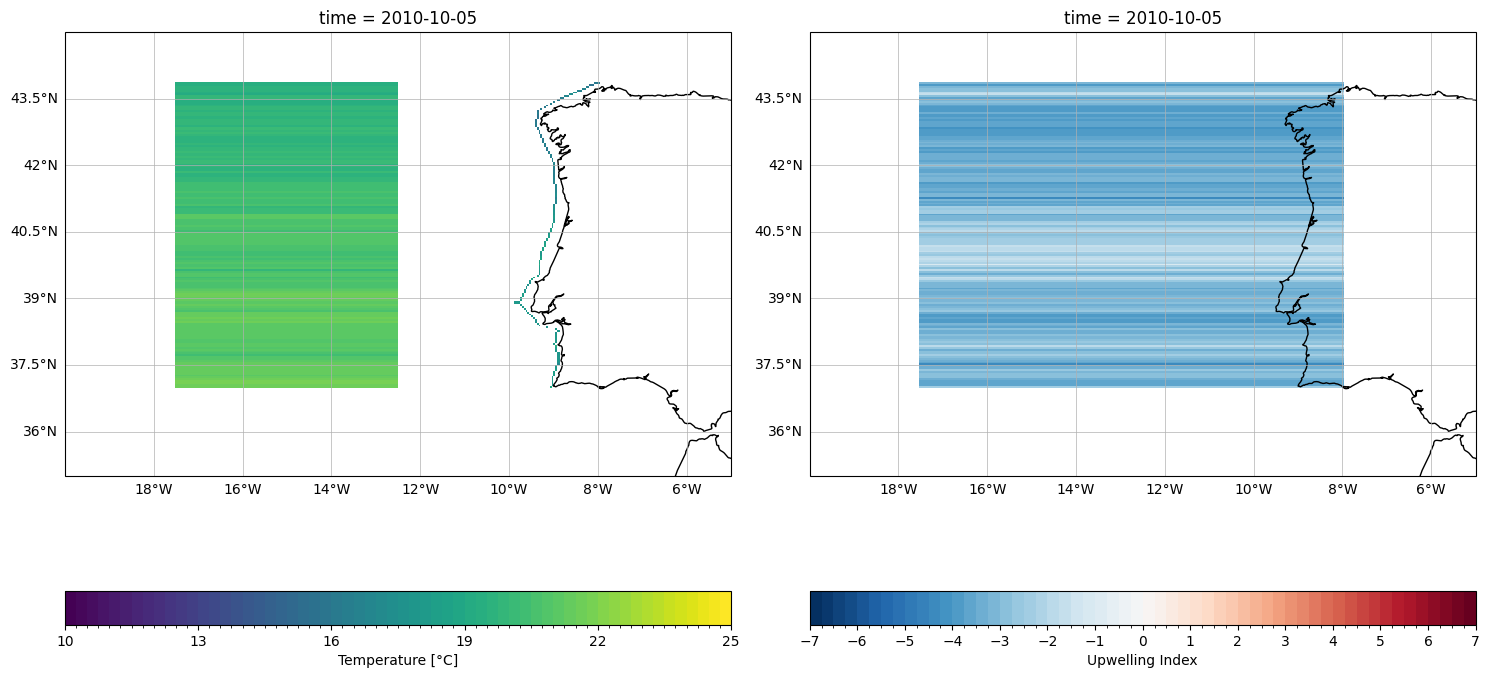

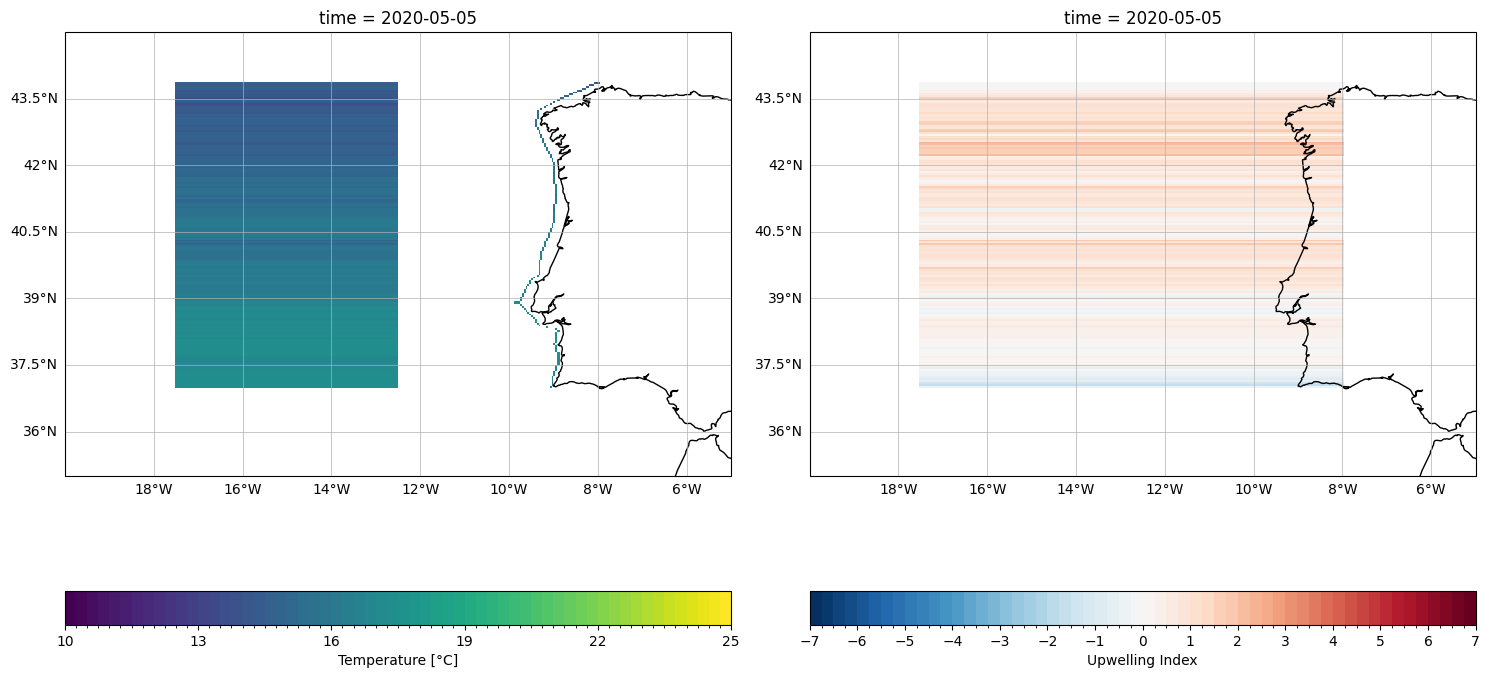

In [6]:
for i in np.arange(0, len(UI_SST.time), 500):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (15,8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    ax1.set_extent([-20, -5, 45, 35])
    gls = ax1.gridlines(draw_labels=True, linewidth = 0.5)
    gls.top_labels = False   # suppress labels
    gls.right_labels = False # suppress right labels
    ax1.coastlines()
    
    plt1 = UI_SST.Tmid.isel(time = i).plot(ax = ax1, x = 'lon', levels = np.arange(10, 25.25, 0.25),  add_colorbar=False, pickradius = 100)
    UI_SST.Toff15W.isel(time = i).plot(ax = ax1, x = 'lon', levels = np.arange(10, 25.25, 0.25),  add_colorbar=False )
    plt.colorbar(plt1, orientation = 'horizontal', label = "Temperature [°C]", ticks = np.arange(10, 28, 3))
    
    ax2.set_extent([-20, -5, 45, 35])
    gls = ax2.gridlines(draw_labels=True, linewidth = 0.5)
    gls.top_labels = False   # suppress labels
    gls.right_labels = False # suppress right labels
    ax2.coastlines()
    
    plt2 = UI_SST.UI.isel(time = i).plot(ax = ax2, x = 'lon', levels = np.arange(-7, 7.25, 0.25),  add_colorbar=False )
    plt.colorbar(plt2, orientation = 'horizontal', label = "Upwelling Index", ticks = np.arange(-7, 8, 1))

    fig.tight_layout()